### Data Extraction

In [1]:
import numpy as np
import pandas as pd
import datetime
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(16,10))
plt.rc('lines', markersize=4)
import pandas_datareader as web
import yfinance as yfin
data=yfin.download('BTC-USD',start='2020-01-01',end="2022-01-26")
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-31,7294.438965,7335.290039,7169.777832,7193.599121,7193.599121,21167946112
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
...,...,...,...,...,...,...
2022-01-21,40699.605469,41060.527344,35791.425781,36457.316406,36457.316406,43011992031
2022-01-22,36471.589844,36688.812500,34349.250000,35030.250000,35030.250000,39714385405
2022-01-23,35047.359375,36433.312500,34784.968750,36276.804688,36276.804688,26017975951


In [2]:
df = pd.DataFrame(data, columns=['Adj Close'])
df.head()
df.info()
df.isna().values.any()
print(df)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 757 entries, 2019-12-31 to 2022-01-25
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  757 non-null    float64
dtypes: float64(1)
memory usage: 11.8 KB
               Adj Close
Date                    
2019-12-31   7193.599121
2020-01-01   7200.174316
2020-01-02   6985.470215
2020-01-03   7344.884277
2020-01-04   7410.656738
...                  ...
2022-01-21  36457.316406
2022-01-22  35030.250000
2022-01-23  36276.804688
2022-01-24  36654.328125
2022-01-25  36954.003906

[757 rows x 1 columns]


In [3]:
future_days = 15
df['Prediction'] = df['Adj Close'].shift(-future_days)
df.tail()

,Adj Close,Prediction
Date,,
2022-01-21,36457.316406,NaN
2022-01-22,35030.250000,NaN
2022-01-23,36276.804688,NaN
2022-01-24,36654.328125,NaN
2022-01-25,36954.003906,NaN


In [4]:
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
y = np.array(df['Prediction'])[:-future_days]

### Price Prediction Using Decision Tree 

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
tree = DecisionTreeRegressor().fit(x_train, y_train)

In [8]:
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)

In [9]:
tree_prediction = tree.predict(x_future)

In [10]:
predictions = tree_prediction 
valid = df[X.shape[0]:]
valid['Predictions'] = predictions

<ipython-input-10-d5809a9b6df8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


### Prediction Results 

In [11]:
Actual=df['Adj Close']
Predic=predictions
dates = pd.date_range(start="2020-01-01", end="2022-01-26")
for i in range(15):
    p=len(Predic)-1-i
    a=len(Actual)-1-i
    d=len(dates)-1-i
    print("DATE: ",dates[d].strftime('%Y-%m-%d'),"   ACTUAL PRICE: ",Actual[a],"    PREDICTED PRICE: ",Predic[p])

DATE:  2022-01-26    ACTUAL PRICE:  36954.00390625     PREDICTED PRICE:  36954.00390625
DATE:  2022-01-25    ACTUAL PRICE:  36654.328125     PREDICTED PRICE:  36654.328125
DATE:  2022-01-24    ACTUAL PRICE:  36276.8046875     PREDICTED PRICE:  36954.00390625
DATE:  2022-01-23    ACTUAL PRICE:  35030.25     PREDICTED PRICE:  35030.25
DATE:  2022-01-22    ACTUAL PRICE:  36457.31640625     PREDICTED PRICE:  36457.31640625
DATE:  2022-01-21    ACTUAL PRICE:  40680.41796875     PREDICTED PRICE:  40680.41796875
DATE:  2022-01-20    ACTUAL PRICE:  41744.328125     PREDICTED PRICE:  41744.328125
DATE:  2022-01-19    ACTUAL PRICE:  42375.6328125     PREDICTED PRICE:  37332.85546875
DATE:  2022-01-18    ACTUAL PRICE:  42250.55078125     PREDICTED PRICE:  42250.55078125
DATE:  2022-01-17    ACTUAL PRICE:  43113.87890625     PREDICTED PRICE:  43113.87890625
DATE:  2022-01-16    ACTUAL PRICE:  43177.3984375     PREDICTED PRICE:  43177.3984375
DATE:  2022-01-15    ACTUAL PRICE:  43099.69921875     P

### Calculating Accuracy

In [12]:
accuracies=[]
for i in range(15):
    p=len(Predic)-1-i
    a=len(Actual)-1-i
    v1=Predic[p]
    v2=Actual[a]
    if v1>=v2:
        accuracies.append(v2/v1)
    if v2>v1:
        accuracies.append(v1/v2)
Overall=0
for x in accuracies:
    Overall=Overall+x
Overall=(Overall/15)*100
print(Overall)

97.92197874570458


### Graphical Representation

[*********************100%***********************]  1 of 1 completed


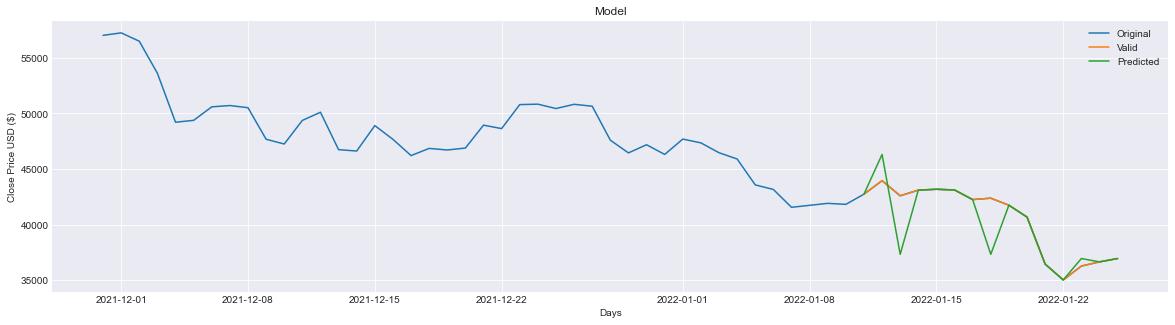

In [14]:
df2=yfin.download('BTC-USD',start='2021-12-01',end="2022-01-26")
plt.figure(figsize=(20,5))
plt.title("Model")
plt.xlabel('Days')
plt.ylabel('Close Price USD ($)')
plt.plot(df2['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(["Original", "Valid", 'Predicted'])
plt.show()